In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.model_selection import train_test_split

from sklearn.metrics import confusion_matrix,roc_auc_score,roc_curve
from sklearn.ensemble import RandomForestClassifier
from sklearn.grid_search import GridSearchCV

C:\Users\masato\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\masato\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\masato\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

In [3]:
train_data.head()

,Age,Gender,T_Bil,D_Bil,ALP,ALT_GPT,AST_GOT,TP,Alb,AG_ratio,disease
0,59,Male,0.786886,0.150498,220.178691,13.467617,21.729246,6.815731,3.112276,1.006802,0
1,69,Male,1.003987,0.195625,221.218413,51.033462,64.752323,6.889608,3.051521,0.751346,1
2,65,Male,0.657140,0.081287,320.770533,12.625011,30.613180,5.947767,2.489167,0.774952,0
3,65,Male,0.906822,0.214173,369.278160,34.347597,54.510085,6.967183,3.613837,0.988155,1
4,22,Female,1.734959,0.197706,222.782025,20.572891,170.010177,5.837537,3.068697,1.026654,0


In [4]:
train_data.loc[train_data["Gender"] == "Male", "Gender"] = 0
train_data.loc[train_data["Gender"] == "Female", "Gender"] = 1

In [5]:
X = train_data.drop(["disease"],axis=1)
y = train_data.disease

In [6]:
x_train,x_test,y_train,y_test = train_test_split(X,y,stratify=y,random_state=0)

In [7]:
forest = RandomForestClassifier(random_state=0)

In [42]:
params = {"n_estimators":[10000],
          "max_features":["sqrt"],
          "max_depth":[6,7,8,9,10],
          "criterion":["gini","entropy"]}

In [43]:
grid = GridSearchCV(estimator=forest,param_grid=params,n_jobs=7,scoring="roc_auc",cv=5)

In [44]:
grid.fit(x_train,y_train)

GridSearchCV(cv=5, error_score='raise',
       estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False),
       fit_params={}, iid=True, n_jobs=7,
       param_grid={'n_estimators': [10000], 'max_features': ['sqrt'], 'max_depth': [6, 7, 8, 9, 10], 'criterion': ['gini', 'entropy']},
       pre_dispatch='2*n_jobs', refit=True, scoring='roc_auc', verbose=0)

In [47]:
grid.best_params_

{'criterion': 'entropy',
 'max_depth': 9,
 'max_features': 'sqrt',
 'n_estimators': 10000}

In [46]:
y_pred_proba = grid.predict_proba(x_test)[:,1]
auc_score = roc_auc_score(y_true=y_test,y_score=y_pred_proba)
print(auc_score)

0.9411239964317575


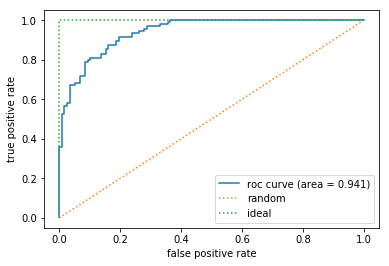

In [48]:
fpr,tpr,thresholds = roc_curve(y_true=y_test,y_score=y_pred_proba)
plt.plot(fpr, tpr, label='roc curve (area = %0.3f)' % auc_score)
plt.plot([0, 1], [0, 1], linestyle=':', label='random')
plt.plot([0, 0, 1], [0, 1, 1], linestyle=':', label='ideal')
plt.legend()
plt.xlabel('false positive rate')
plt.ylabel('true positive rate')
plt.show()

In [49]:
test_data["Gender"] = test_data["Gender"].apply(lambda x: 1 if x=="Male" else 0)
test_pred_prob = grid.predict_proba(test_data)[:,1]
submit = pd.Series(data=test_pred_prob)
submit.to_csv("grid_randomforest_proba.csv")